In [35]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 2.3.1. Загрузка данных и первичный осмотр

In [ ]:
# Чтение файла
df = pd.read_csv("./S02-hw-dataset.csv")

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [10]:
print("Первые строки в датасете")
df.head()

Первые строки в датасете


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [11]:
print("Информация о столбцах и типах")
df.info()

Информация о столбцах и типах
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [12]:
print("базовые описательные статистики")
df.describe()

базовые описательные статистики


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


# 2.3.2. Пропуски, дубликаты и базовый контроль качества

In [ ]:
# Количество пропусков в датасете
df.isna().sum()

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64

In [17]:
# Доля пропусков в датасете
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [20]:
# 2. Полностью дублирующие строки
duplicate_rows = df.duplicated(keep=False)
duplicate_count = duplicate_rows.sum()

print(f"\nКоличество полностью дублирующих строк: {duplicate_count}")


if duplicate_count > 0:
    print("Примеры дублирующих строк:")
    print(df[duplicate_rows].head())


Количество полностью дублирующих строк: 2
Примеры дублирующих строк:
    user_id   age country  purchases  revenue
9        10  24.0      RU          7      511
40       10  24.0      RU          7      511


In [32]:
# 3. Проверка значений

# Отрицательные покупки
if (df['purchases'] < 0).any():
    print(f"Отрицательные покупки: {df[df['purchases'] < 0].shape[0]} строк")
    print(df[df['purchases'] < 0])

Отрицательные покупки: 1 строк
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [33]:
# Странный возраст
print(f"\nВозраст > 100: {df[df['age'] > 100].shape[0]} строк")
print(df[df['age'] > 100])


Возраст > 100: 1 строк
   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [34]:
# Нулевой доход при покупках
problem = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
print(f"\nПокупки есть, а дохода нет: {problem.shape[0]} строк")
print(problem)


Покупки есть, а дохода нет: 1 строк
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


# 2.3.3. Базовый EDA: группировки, агрегаты и частоты

In [36]:
# 1. Частоты для категориальных переменных
print("Частоты по странам:")
print(df['country'].value_counts())
print()

print("Самые частые страны:")
print(df['country'].value_counts().head(3))
print()

Частоты по странам:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Самые частые страны:
country
RU    13
FR    12
US     8
Name: count, dtype: int64



In [37]:
# 2. Группировка с агрегатами
print("Статистика по странам:")
grouped = df.groupby('country').agg({
    'age': 'mean',
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']
})
print(grouped.round(2))
print()

Статистика по странам:
           age purchases      revenue       
          mean      mean sum     mean    sum
country                                     
CN       24.00      4.50   9  1054.00   2108
DE       34.60      6.50  39  1445.50   8673
FR       46.25      4.25  51   675.92   8111
RU       30.08      4.77  62   790.08  10271
US       36.71      4.62  37   557.38   4459



In [38]:
# 3. Возрастные группы
bins = [0, 20, 30, 40, 50, 100, 150]
labels = ['<20', '20-30', '30-40', '40-50', '50-100', '>100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print("Средние покупки по возрастным группам:")
print(df.groupby('age_group')['purchases'].mean().round(2))
print()

Средние покупки по возрастным группам:
age_group
<20       6.00
20-30     4.46
30-40     6.00
40-50     3.00
50-100    5.00
>100     -1.00
Name: purchases, dtype: float64



/var/folders/vy/dg6syd7s05q8h9qyfrphndqh0000gn/T/ipykernel_41316/796795411.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('age_group')['purchases'].mean().round(2))


/var/folders/vy/dg6syd7s05q8h9qyfrphndqh0000gn/T/ipykernel_41316/3384138995.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(countries_data, labels=df['country'].unique())


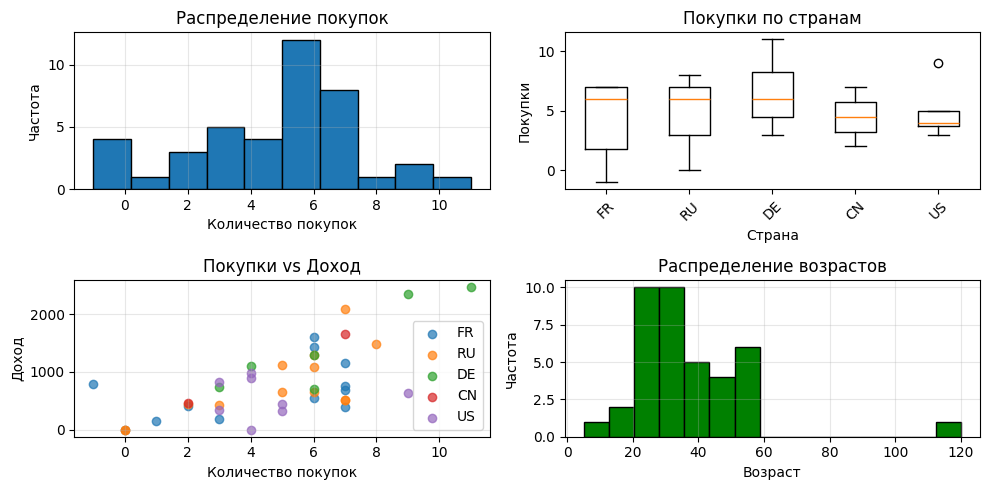

График сохранен в figures/my_visualizations.png


In [39]:
# 4. Визуализация
# Создаем папку для графиков
os.makedirs('figures', exist_ok=True)

# Гистограмма покупок
plt.figure(figsize=(10, 5))

# Гистограмма
plt.subplot(2, 2, 1)
plt.hist(df['purchases'].dropna(), bins=10, edgecolor='black')
plt.title('Распределение покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)

# Боксплот по странам
plt.subplot(2, 2, 2)
countries_data = [df[df['country'] == c]['purchases'] for c in df['country'].unique()]
plt.boxplot(countries_data, labels=df['country'].unique())
plt.title('Покупки по странам')
plt.xlabel('Страна')
plt.ylabel('Покупки')
plt.xticks(rotation=45)

# Диаграмма рассеяния
plt.subplot(2, 2, 3)
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.scatter(country_data['purchases'], country_data['revenue'],
                label=country, alpha=0.7)
plt.title('Покупки vs Доход')
plt.xlabel('Количество покупок')
plt.ylabel('Доход')
plt.legend()
plt.grid(True, alpha=0.3)

# Гистограмма возрастов
plt.subplot(2, 2, 4)
plt.hist(df['age'].dropna(), bins=15, edgecolor='black', color='green')
plt.title('Распределение возрастов')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/my_visualizations.png', dpi=100, bbox_inches='tight')
plt.show()

print("График сохранен в figures/my_visualizations.png")